# Date Exploration (6min == 0.01)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

A good chocolate soufflé is decadent, delicious, and delicate. But, it's a challenge to prepare. When you pull a disappointingly deflated dessert out of the oven, you instinctively retrace your steps to identify at what point you went wrong. Bosch, one of the world's leading manufacturing companies, has an imperative to ensure that the recipes for the production of its advanced mechanical components are of the highest quality and safety standards. Part of doing so is closely monitoring its parts as they progress through the manufacturing processes.

Because Bosch records data at every step along its assembly lines, they have the ability to apply advanced analytics to improve these manufacturing processes. However, the intricacies of the data and complexities of the production line pose problems for current methods.

In this competition, Bosch is challenging Kagglers to predict internal failures using thousands of measurements and tests made for each component along the assembly line. This would enable Bosch to bring quality products at lower costs to the end user.

Submissions are evaluated on the Matthews correlation coefficient (MCC) between the predicted and the observed response. The MCC is given by:

MCC=(TP∗TN)−(FP∗FN)(TP+FP)(TP+FN)(TN+FP)(TN+FN)−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−√,


where TP is the number of true positives, TN the number of true negatives, FP the number of false positives, and FN the number of false negatives.

Data Description

The data for this competition represents measurements of parts as they move through Bosch's production lines. Each part has a unique Id. The goal is to predict which parts will fail quality control (represented by a 'Response' = 1).

The dataset contains an extremely large number of anonymized features. Features are named according to a convention that tells you the production line, the station on the line, and a feature number. E.g. L3_S36_F3939 is a feature measured on line 3, station 36, and is feature number 3939.

On account of the large size of the dataset, we have separated the files by the type of feature they contain: numerical, categorical, and finally, a file with date features. The date features provide a timestamp for when each measurement was taken. Each date column ends in a number that corresponds to the previous feature number. E.g. the value of L0_S0_D1 is the time at which L0_S0_F0 was taken.

In addition to being one of the largest datasets (in terms of number of features) ever hosted on Kaggle, the ground truth for this competition is highly imbalanced. Together, these two attributes are expected to make this a challenging problem.

File descriptions

- train_numeric.csv - the training set numeric features (this file contains the 'Response' variable)
- test_numeric.csv - the test set numeric features (you must predict the 'Response' for these Ids)
- train_categorical.csv - the training set categorical features
- test_categorical.csv - the test set categorical features
- train_date.csv - the training set date features
- test_date.csv - the test set date features
- sample_submission.csv - a sample submission file in the correct format

Giai thich dataset:
1. Moi line se co mot so station, id cua tung station la rieng biet o tung line, do do chi can biet part nam o station nao la duoc roi, sau do se tu truy ra line nao
2. Moi part khi di qua station se duoc do cac feature tuong ung tai mot thoi gian cu the, do do column se theo ID (part), time (thoi gian do), L3_S36_f3939: part do vao thoi gian 87.2 dang o line 3, station 36, do feature 3939
3. Tai 1 station part se do nhieu feature khac nhau , thoi gian do tat ca feature cua part do tai station do la nhu nhau

Hi,
The timestamps were anonymized in this competition. My motivation was to understand how long is the test/ train period. This would allow to use some intuition for feature engineering.
My main question was: what does 0.01 time difference mean? Is it ms, s, m, hour, day? To answer that I tried to find periodic patterns using auto correlation.

I can't help you to answer the how to begin question. Fortunately there are plenty of forum topics with similar questions.
https://www.kaggle.com/forums/f/208/getting-started
Just google "kaggle start" or "kaggle begin"



In [ ]:
# Let's check the min and max times for each station
def get_station_times(dates, withId=False):
    times = []
    cols = list(dates.columns)
    if 'Id' in cols:
        cols.remove('Id')
    for feature_name in cols:
        if withId:
            df = dates[['Id', feature_name]].copy()
            df.columns = ['Id', 'time']
        else:
            df = dates[[feature_name]].copy()
            df.columns = ['time']
        df['station'] = feature_name.split('_')[1][1:]
        df = df.dropna()
        times.append(df)
    return pd.concat(times)

In [ ]:
train_date_part = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', nrows=10000)
print(train_date_part.shape)
train_date_part

In [ ]:
train_date_part_reprocess=get_station_times(train_date_part, withId=True)
train_date_part_reprocess

In [ ]:
train_numeric = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip', nrows=10000)
print(train_numeric.shape)
train_numeric

In [ ]:
len(set(train_numeric.Id))

In [ ]:
train_categorical = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip', nrows=10000)
print(train_categorical.shape)
train_categorical

In [ ]:
# Let's check the min and max times for each station
# Tach tung cot ra, sau do dropna tung cot, roi append tat ca lai voi nhau
    
dates=train_date_part.copy()
withId=True
times = []
cols = list(dates.columns)
if 'Id' in cols:
    cols.remove('Id')
for feature_name in cols:
    if withId:
        df = dates[['Id', feature_name]].copy()
        df.columns = ['Id', 'time']
    else:
        df = dates[[feature_name]].copy()
        df.columns = ['time']
    df['line'] = feature_name.split('_')[0][1:]
    df['station'] = feature_name.split('_')[1][1:]
    df['feature_number'] = feature_name.split('_')[2][1:]
    df = df.dropna()
    print(df.shape)
    times.append(df)
    print(len(times))
station_times=pd.concat(times)
station_times

In [ ]:
station_times=station_times.sort_values(by=['Id','station'])
station_times['line']=station_times['line'].astype('int64')
station_times['station']=station_times['station'].astype('int64')
station_times['feature_number']=station_times['feature_number'].astype('int64')
print(station_times.dtypes)
station_times

In [ ]:
# How many station in each line ?
set(station_times[station_times.line==0].station)

In [ ]:
# How many station in each time ?
print(set(station_times[station_times.time==82.24].station))
# How many part in each time ?
print(set(station_times[station_times.time==82.24].Id))

In [ ]:
time=82.24
print('time: ',time)
station_=set(station_times[station_times.time==82.24].station)
for j in station_:
    print('station:', j)
    print('part: ',set(station_times[(station_times.time==time) & (station_times.station==j)].Id))
    print('feature_number: ',set(station_times[(station_times.time==time) & (station_times.station==j)].feature_number))
        

In [ ]:
time=1379.78
print('time: ',time)
station_=set(station_times[station_times.time==82.24].station)
for j in station_:
    print('station:', j)
    print('part: ',set(station_times[(station_times.time==time) & (station_times.station==j)].Id))
    print('feature_number: ',set(station_times[(station_times.time==time) & (station_times.station==j)].feature_number))
        

In [ ]:
set(station_times[station_times.line==1].station)

In [ ]:
set(station_times[station_times.line==2].station)

In [ ]:
set(station_times[station_times.line==3].station)

Each station is unique in each line, so no need to include line here

In [ ]:
station_times.line.value_counts()

In [ ]:
set(station_times.Id)

In [ ]:
station_times.station.value_counts()

In [ ]:
station_times.feature_number.value_counts()

In [ ]:
part_id=6
part_filter=station_times[station_times.Id==part_id]
part_filter_line=set(part_filter.line)
part_filter_station=set(part_filter.station)
print('total_line: ',part_filter_line)
print('total_station: ',part_filter_station)

for i in part_filter_line:
    print('line:', i)
    for j in part_filter_station:
        print('station:', j)
        print('feature_number: ',set(part_filter[(part_filter.line==i) & (part_filter.station==j)].feature_number))
        print('time: ',set(part_filter[(part_filter.line==i) & (part_filter.station==j)].time))
        

In [ ]:
def part_info(part_id):
    #part_id=part_id
    part_filter=station_times[station_times.Id==part_id]
    part_filter_line=set(part_filter.line)
    part_filter_station=set(part_filter.station)
    print('total_line: ',part_filter_line)
    print('total_station: ',part_filter_station)
    print('-'*60)

    for i in part_filter_line:
        print('-'*10)
        print('line:', i)
        for j in part_filter_station:
            print('station:', j)
            print('feature_number: ',set(part_filter[(part_filter.line==i) & (part_filter.station==j)].feature_number))
            print('time: ',set(part_filter[(part_filter.line==i) & (part_filter.station==j)].time))
        

In [ ]:
part_info(120)

In [ ]:
min_station_times = station_times.groupby(['Id', 'station']).min()['time']
max_station_times = station_times.groupby(['Id', 'station']).max()['time']

In [ ]:
min_station_times

In [ ]:
max_station_times

In [ ]:
train_date_part

In [ ]:
train_date_part.count()

In [ ]:
# Read station times for train and test
date_cols = train_date_part.drop('Id', axis=1).count().reset_index().\
            sort_values(by=0, ascending=False)
date_cols

In [ ]:
date_cols['station'] = date_cols['index'].apply(lambda s: s.split('_')[1])
date_cols

In [ ]:
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()
date_cols # selected features
# remove all duplicate station (with differtion feature measurment each station)

In [ ]:
# applied these columns to all training data set
train_date = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', usecols=date_cols)
print(train_date.shape)
train_date

In [ ]:
dates=train_date.copy()
withId=False
times = []
cols = list(dates.columns)
if 'Id' in cols:
    cols.remove('Id')
for feature_name in cols:
    if withId:
        df = dates[['Id', feature_name]].copy()
        df.columns = ['Id', 'time']
    else:
        df = dates[[feature_name]].copy()
        df.columns = ['time']
    df['line'] = feature_name.split('_')[0][1:]
    df['station'] = feature_name.split('_')[1][1:]
    df['feature_number'] = feature_name.split('_')[2][1:]
    df = df.dropna()
    #print(df.shape)
    times.append(df)
    #print(len(times))
train_station_times=pd.concat(times)
print(train_station_times.shape)
train_station_times
# Do chi giu lai 52 columns nen tong so dong 14 tr, khong qua nhieu, neu giu lai 1000 columns thi
# con so se rat lon

In [ ]:
train_time_cnt = train_station_times.groupby('time').count()[['station']].reset_index()
train_time_cnt.columns = ['time', 'cnt']
print(train_time_cnt.shape)
train_time_cnt
# Loc thoi gian testing tung feature ung voi bao nhieu station.

In [ ]:
test_date = pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip', usecols=date_cols)
print(test_date.shape)
test_date

In [ ]:
dates=test_date.copy()
withId=False
times = []
cols = list(dates.columns)
if 'Id' in cols:
    cols.remove('Id')
for feature_name in cols:
    if withId:
        df = dates[['Id', feature_name]].copy()
        df.columns = ['Id', 'time']
    else:
        df = dates[[feature_name]].copy()
        df.columns = ['time']
    df['line'] = feature_name.split('_')[0][1:]
    df['station'] = feature_name.split('_')[1][1:]
    df['feature_number'] = feature_name.split('_')[2][1:]
    df = df.dropna()
    #print(df.shape)
    times.append(df)
    #print(len(times))
test_station_times=pd.concat(times)
print(test_station_times.shape)
test_station_times

In [ ]:
test_time_cnt = test_station_times.groupby('time').count()[['station']].reset_index()
test_time_cnt.columns = ['time', 'cnt']
print(test_time_cnt.shape)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_time_cnt['time'].values, train_time_cnt['cnt'].values, 'b.', alpha=0.1, label='train')
plt.plot(test_time_cnt['time'].values, test_time_cnt['cnt'].values, 'r.', alpha=0.1, label='test')
plt.title('Original date values')
plt.ylabel('Number of records')
plt.xlabel('Time')
fig.savefig('original_date_values.png', dpi=300)
plt.show()

In [ ]:
print((train_time_cnt['time'].min(), train_time_cnt['time'].max()))
print((test_time_cnt['time'].min(), test_time_cnt['time'].max()))

A few observations:

- Train and test set has the same time period
- There is a clear periodic pattern
- The dates are transformed to 0 - 1718 with granularity of 0.01
- There is a gap in the middle

Could we figure out what does 0.01 mean? Let's check a few auto correlations!

In [ ]:
time_ticks = np.arange(train_time_cnt['time'].min(), train_time_cnt['time'].max() + 0.01, 0.01)
time_ticks = pd.DataFrame({'time': time_ticks})
time_ticks

In [ ]:
time_ticks = pd.merge(time_ticks, train_time_cnt, how='left', on='time')
time_ticks = time_ticks.fillna(0)
time_ticks
# Dem bao nhieu station lien quan toi specific time trong toan bo data set

In [ ]:
# Autocorrelation
x = time_ticks['cnt'].values
max_lag = 8000
auto_corr_ks = range(1, max_lag)
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
auto_corr

In [ ]:
print(len(auto_corr_ks))
print(auto_corr_ks)
print(len(x))
print(x)

In [ ]:
k=1
print('k',k)
print(len(x[:-k]))
print(len(x[k:]))
print(x[:-k])
print(x[k:])
print('corrcoef: \n',np.corrcoef(x[:-k], x[k:]))
print('corrcoef: \n',np.corrcoef(x[:-k], x[k:])[0,1])
print('corrcoef: \n',np.array([1]+ np.corrcoef(x[:-k], x[k:])[0,1]))

In [ ]:
k=3
print('k',k)
print(len(x[:-k]))
print(len(x[k:]))
print(x[:-k])
print(x[k:])
print('corrcoef: \n',np.corrcoef(x[:-k], x[k:]))
print('corrcoef: \n',np.corrcoef(x[:-k], x[k:])[0,1])
print('corrcoef: \n',np.array([1]+ np.corrcoef(x[:-k], x[k:])[0,1]))

Autocorrelation period 0.01

In [ ]:
print(len(auto_corr))
auto_corr

In [ ]:
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')
plt.title('Train Sensor Time Auto-correlation')

Autocorrelation period 25

In [ ]:
period = 25
auto_corr_ks = list(range(period, max_lag, period))
print(len(auto_corr_ks))
print(auto_corr_ks)

In [ ]:
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
auto_corr

In [ ]:
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')

Autocorrelation period 1675

In [ ]:
period = 1675
auto_corr_ks = list(range(period, max_lag, period))
print(len(auto_corr_ks))
print(auto_corr_ks)

In [ ]:
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
auto_corr

In [ ]:
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')

In [ ]:
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')
plt.title('Train Sensor Time Auto-correlation')

period = 25
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')

period = 1675
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')

plt.xlabel('k * 0.01 -  autocorrelation lag')
plt.ylabel('autocorrelation')
plt.legend(loc=0)
#fig.savefig('train_time_auto_correlation.png', dpi=300)

The largest peaks are at approximately 1680 ticks. Let's call it a week ;)

In each week we could see 7 local maxima ~ days.

In [ ]:
train_time_cnt

In [ ]:
week_duration = 1679
train_time_cnt['week_part'] = ((train_time_cnt['time'].values * 100) % week_duration).astype(np.int64)
train_time_cnt
# Week_part sẽ lặp lại cứ mỗi chu kỳ 1679 đi qua

In [ ]:
print(len(set(train_time_cnt.time)))
print(len(set(train_time_cnt.week_part)))

In [ ]:
x = 32
y = 15
print(x % y)

In [ ]:
x = 47
y = 15
print(x % y)

In [ ]:
print(0.01*100 % week_duration)
print(10*100 % week_duration)
print(1718*100 % week_duration)

In [ ]:
fig = plt.figure()
plt.plot(train_time_cnt.time.values, train_time_cnt.cnt.values, 'b.',
         alpha=0.5, label='train count')

In [ ]:
# Aggregate weekly stats
train_week_part = train_time_cnt.groupby(['week_part'])[['cnt']].sum().reset_index()
train_week_part

In [ ]:
fig = plt.figure()
plt.plot(train_week_part.week_part.values, train_week_part.cnt.values, 'b.',
         alpha=0.5, label='train count')
# Gộp toàn bộ count station theo tuần rồi plot

In [ ]:
y_train = train_week_part['cnt'].rolling(window=20, center=True).mean().values
y_train

In [ ]:
plt.plot(train_week_part.week_part.values, y_train, 'b-', linewidth=4, alpha=0.5, label='train count smooth')

In [ ]:
week_duration = 1679
train_time_cnt['week_part'] = ((train_time_cnt['time'].values * 100) % week_duration).astype(np.int64)
# Aggregate weekly stats
train_week_part = train_time_cnt.groupby(['week_part'])[['cnt']].sum().reset_index()
fig = plt.figure()
plt.plot(train_week_part.week_part.values, train_week_part.cnt.values, 'b.', alpha=0.5, label='train count')
y_train = train_week_part['cnt'].rolling(window=20, center=True).mean().values
plt.plot(train_week_part.week_part.values, y_train, 'b-', linewidth=4, alpha=0.5, label='train count smooth')
plt.title('Relative Part of week')
plt.ylabel('Number of records')
plt.xlim(0, 1680)
fig.savefig('week_duration.png', dpi=300)

# XGBoost from Kaggle

https://www.kaggle.com/joconnor/python-xgboost-starter-0-209-public-mcc

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# I'm limited by RAM here and taking the first N rows is likely to be
# a bad idea for the date data since it is ordered.
# Sample the data in a roundabout way:
date_chunks = pd.read_csv("../input/bosch-production-line-performance/train_date.csv.zip", index_col=0, chunksize=100000, dtype=np.float32)
num_chunks = pd.read_csv("../input/bosch-production-line-performance/train_numeric.csv.zip", index_col=0,
                         usecols=list(range(969)), chunksize=100000, dtype=np.float32)

In [ ]:
X = pd.concat([pd.concat([dchunk, nchunk], axis=1).sample(frac=0.05)
               for dchunk, nchunk in zip(date_chunks, num_chunks)])
X

In [ ]:

y = pd.read_csv("../input/bosch-production-line-performance/train_numeric.csv.zip", index_col=0, usecols=[0,969], dtype=np.float32)\
.loc[X.index].values.ravel()
y


In [ ]:
len(y)

In [ ]:
clf = XGBClassifier(base_score=0.005)
clf.fit(X, y)

In [ ]:
import matplotlib.pyplot as plt
# threshold for a manageable number of features
plt.hist(clf.feature_importances_[clf.feature_importances_>0])
important_indices = np.where(clf.feature_importances_>0.005)[0]
print(important_indices)

In [ ]:
# load entire dataset for these features. 
# note where the feature indices are split so we can load the correct ones straight from read_csv
n_date_features = 1156
X = np.concatenate([
    pd.read_csv("../input/bosch-production-line-performance/train_date.csv.zip", index_col=0, dtype=np.float32,
                usecols=np.concatenate([[0], important_indices[important_indices < n_date_features] + 1])).values,
    pd.read_csv("../input/bosch-production-line-performance/train_numeric.csv.zip", index_col=0, dtype=np.float32,
                usecols=np.concatenate([[0], important_indices[important_indices >= n_date_features] + 1 - 1156])).values
], axis=1)
y = pd.read_csv("../input/bosch-production-line-performance/train_numeric.csv.zip", index_col=0, dtype=np.float32, usecols=[0,969]).values.ravel()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
pd.DataFrame(y)[0].value_counts(normalize=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = XGBClassifier(max_depth=5, base_score=0.005)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

In [ ]:
from collections import Counter
# count examples in each class
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

In [ ]:
clf = XGBClassifier(scale_pos_weight=171)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

In [ ]:
clf = XGBClassifier(scale_pos_weight=250)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

# Random forest

https://www.kaggle.com/aakashveera/random-forest

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
date = pd.read_csv('/content/drive/My Drive/Data/Factory_project/Bosh/train_date.csv.zip', nrows=10000)
numeric = pd.read_csv('/content/drive/My Drive/Data/Factory_project/Bosh/train_numeric.csv.zip', nrows=10000)
#category = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip', nrows=10000)
# Mục đích đọc 10000 dòng là để lấy các thông tin về station name

In [4]:
date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.26,82.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1618.72,1618.72,1618.72,1618.72,1618.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.22,1149.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.66,602.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904.18,904.18,904.18,904.18,904.18,904.18,904.18,904.18,904.18,NaN,NaN,904.19,904.19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640

In [5]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,0.061,0.233,0.233,0.167,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,0.621,0.049,-0.185,0.005,0.0,0.119,-0.288,0.044,NaN,NaN,-0.184,-0.028,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,-0.126,0.310,0.310,0.047,-0.100,-0.013,0.580,0.108,-0.260,-0.002,0.0,0.01,0.278,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## FEATURE ENGINEERING

The list of numeric features is selected based on the other XGBOOST classifier check the numericclassifier notebook

In [6]:
num_feats = ['Id',
       'L3_S30_F3514', 'L0_S9_F200', 'L3_S29_F3430', 'L0_S11_F314',
       'L0_S0_F18', 'L3_S35_F3896', 'L0_S12_F350', 'L3_S36_F3918',
       'L0_S0_F20', 'L3_S30_F3684', 'L1_S24_F1632', 'L0_S2_F48',
       'L3_S29_F3345', 'L0_S18_F449', 'L0_S21_F497', 'L3_S29_F3433',
       'L3_S30_F3764', 'L0_S1_F24', 'L3_S30_F3554', 'L0_S11_F322',
       'L3_S30_F3564', 'L3_S29_F3327', 'L0_S2_F36', 'L0_S9_F180',
       'L3_S33_F3855', 'L0_S0_F4', 'L0_S21_F477', 'L0_S5_F114',
       'L0_S6_F122', 'L1_S24_F1122', 'L0_S9_F165', 'L0_S18_F439',
       'L1_S24_F1490', 'L0_S6_F132', 'L3_S29_F3379', 'L3_S29_F3336',
       'L0_S3_F80', 'L3_S30_F3749', 'L1_S24_F1763', 'L0_S10_F219',
 'Response']

In [7]:
length = date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
date_cols

,index,0
1054,L3_S37_D3949,9473
1053,L3_S37_D3947,9473
1052,L3_S37_D3945,9473
1051,L3_S37_D3943,9473
1050,L3_S37_D3942,9473
...,...,...
1091,L3_S42_D4037,0
1090,L3_S42_D4033,0
1089,L3_S42_D4029,0
302,L1_S24_D1158,0


In [8]:
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
stations

['S0',
 'S1',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S2',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S3',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S4',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S5',
 'S50',
 'S51',
 'S6',
 'S7',
 'S8',
 'S9']

In [9]:
len(stations)

52

In [10]:
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols

,index,0,station
1054,L3_S37_D3949,9473,S37
1053,L3_S37_D3947,9473,S37
1052,L3_S37_D3945,9473,S37
1051,L3_S37_D3943,9473,S37
1050,L3_S37_D3942,9473,S37
...,...,...,...
1091,L3_S42_D4037,0,S42
1090,L3_S42_D4033,0,S42
1089,L3_S42_D4029,0,S42
302,L1_S24_D1158,0,S24


In [11]:
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()
date_cols

['L3_S37_D3949',
 'L3_S30_D3541',
 'L3_S29_D3428',
 'L3_S34_D3877',
 'L3_S33_D3870',
 'L0_S0_D3',
 'L0_S1_D30',
 'L0_S8_D145',
 'L3_S36_D3919',
 'L3_S35_D3910',
 'L0_S5_D115',
 'L0_S3_D70',
 'L0_S6_D120',
 'L0_S7_D143',
 'L0_S2_D54',
 'L0_S4_D106',
 'L0_S12_D333',
 'L0_S20_D465',
 'L0_S13_D355',
 'L0_S10_D266',
 'L0_S11_D284',
 'L0_S9_D192',
 'L2_S26_D3084',
 'L1_S24_D1828',
 'L0_S19_D457',
 'L0_S17_D432',
 'L0_S14_D380',
 'L0_S15_D401',
 'L0_S16_D428',
 'L2_S27_D3156',
 'L0_S18_D447',
 'L0_S21_D469',
 'L0_S23_D629',
 'L0_S22_D608',
 'L3_S41_D4021',
 'L3_S40_D3981',
 'L3_S45_D4129',
 'L3_S48_D4203',
 'L3_S47_D4155',
 'L3_S39_D3974',
 'L3_S51_D4255',
 'L1_S25_D1887',
 'L3_S31_D3848',
 'L3_S43_D4097',
 'L3_S49_D4208',
 'L3_S50_D4254',
 'L3_S44_D4122',
 'L3_S38_D3953',
 'L3_S32_D3852',
 'L2_S28_D3234',
 'L3_S46_D4135',
 'L3_S42_D4057']

Chỉ giữ lại duy nhất các unique station column, tương ứng với feature measurement và line

In [12]:
data = None
for chunk in pd.read_csv('/content/drive/My Drive/Data/Factory_project/Bosh/train_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [13]:
data

,Id,S0,S1,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S2,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S3,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S4,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S5,S50,S51,S6,S7,S8,S9,start_station,end_station
0,4,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1,6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42
2,7,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
3,9,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
4,11,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1183743,2367491,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42
1183744,2367492,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1183745,2367493,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42


In [14]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [15]:
len(date_cols)

52

In [16]:
data

,Id,start_station,end_station
0,4,0,42
1,6,2,42
2,7,0,42
3,9,0,42
4,11,0,42
...,...,...,...
1183742,2367490,0,42
1183743,2367491,2,42
1183744,2367492,0,42
1183745,2367493,0,42


In [17]:
usefuldatefeatures

['Id',
 'L3_S37_D3949',
 'L3_S30_D3541',
 'L3_S29_D3428',
 'L3_S34_D3877',
 'L3_S33_D3870',
 'L0_S0_D3',
 'L0_S1_D30',
 'L0_S8_D145',
 'L3_S36_D3919',
 'L3_S35_D3910',
 'L0_S5_D115',
 'L0_S3_D70',
 'L0_S6_D120',
 'L0_S7_D143',
 'L0_S2_D54',
 'L0_S4_D106',
 'L0_S12_D333',
 'L0_S20_D465',
 'L0_S13_D355',
 'L0_S10_D266',
 'L0_S11_D284',
 'L0_S9_D192',
 'L2_S26_D3084',
 'L1_S24_D1828',
 'L0_S19_D457',
 'L0_S17_D432',
 'L0_S14_D380',
 'L0_S15_D401',
 'L0_S16_D428',
 'L2_S27_D3156',
 'L0_S18_D447',
 'L0_S21_D469',
 'L0_S23_D629',
 'L0_S22_D608',
 'L3_S41_D4021',
 'L3_S40_D3981',
 'L3_S45_D4129',
 'L3_S48_D4203',
 'L3_S47_D4155',
 'L3_S39_D3974',
 'L3_S51_D4255',
 'L1_S25_D1887',
 'L3_S31_D3848',
 'L3_S43_D4097',
 'L3_S49_D4208',
 'L3_S50_D4254',
 'L3_S44_D4122',
 'L3_S38_D3953',
 'L3_S32_D3852',
 'L2_S28_D3234',
 'L3_S46_D4135',
 'L3_S42_D4057']

In [18]:
len(chunk.columns.values.tolist())

55

In [20]:
minmaxfeatures = None
for chunk in pd.read_csv('/content/drive/My Drive/Data/Factory_project/Bosh/train_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

34

In [21]:
df_mindate_chunk

,Id,mindate,maxdate,min_time_station,max_time_station
1150000,2300099,672.88,675.01,0,37
1150001,2300100,975.14,977.89,0,33
1150002,2300103,1583.05,1585.22,0,33
1150003,2300104,191.66,196.45,0,37
1150004,2300109,745.28,762.14,26,37
...,...,...,...,...,...
1183742,2367490,1239.90,1244.04,0,33
1183743,2367491,624.22,626.66,12,36
1183744,2367492,1482.18,1490.61,0,34
1183745,2367493,608.83,610.75,0,33


In [22]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [23]:
minmaxfeatures

,Id,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id
325556,651542,0.00,1.53,0,37,543349.0,NaN
54038,108193,0.01,1.61,0,33,-413069.0,-543349.0
260490,521262,0.01,1.53,0,36,-66537.0,413069.0
293761,587799,0.01,1.52,0,34,-9001.0,66537.0
298264,596800,0.01,1.52,0,35,-72717.0,9001.0
...,...,...,...,...,...,...,...
1154303,2308719,NaN,NaN,-1,-1,-2100.0,2482.0
1155392,2310819,NaN,NaN,-1,-1,-6246.0,2100.0
1158524,2317065,NaN,NaN,-1,-1,-2579.0,6246.0
1159820,2319644,NaN,NaN,-1,-1,-5085.0,2579.0


In [24]:
cols = [['Id']+date_cols,num_feats]
traindata = None
trainfiles = ['train_date.csv.zip','train_numeric.csv.zip']

In [25]:
cols

[['Id',
  'L3_S37_D3949',
  'L3_S30_D3541',
  'L3_S29_D3428',
  'L3_S34_D3877',
  'L3_S33_D3870',
  'L0_S0_D3',
  'L0_S1_D30',
  'L0_S8_D145',
  'L3_S36_D3919',
  'L3_S35_D3910',
  'L0_S5_D115',
  'L0_S3_D70',
  'L0_S6_D120',
  'L0_S7_D143',
  'L0_S2_D54',
  'L0_S4_D106',
  'L0_S12_D333',
  'L0_S20_D465',
  'L0_S13_D355',
  'L0_S10_D266',
  'L0_S11_D284',
  'L0_S9_D192',
  'L2_S26_D3084',
  'L1_S24_D1828',
  'L0_S19_D457',
  'L0_S17_D432',
  'L0_S14_D380',
  'L0_S15_D401',
  'L0_S16_D428',
  'L2_S27_D3156',
  'L0_S18_D447',
  'L0_S21_D469',
  'L0_S23_D629',
  'L0_S22_D608',
  'L3_S41_D4021',
  'L3_S40_D3981',
  'L3_S45_D4129',
  'L3_S48_D4203',
  'L3_S47_D4155',
  'L3_S39_D3974',
  'L3_S51_D4255',
  'L1_S25_D1887',
  'L3_S31_D3848',
  'L3_S43_D4097',
  'L3_S49_D4208',
  'L3_S50_D4254',
  'L3_S44_D4122',
  'L3_S38_D3953',
  'L3_S32_D3852',
  'L2_S28_D3234',
  'L3_S46_D4135',
  'L3_S42_D4057'],
 ['Id',
  'L3_S30_F3514',
  'L0_S9_F200',
  'L3_S29_F3430',
  'L0_S11_F314',
  'L0_S0_F18',
  

In [27]:
for i,f in enumerate(trainfiles):
    
    subset = None
    #/content/drive/My Drive/Data/Factory_project/Bosh/train_numeric.csv.zip
    for chunk in pd.read_csv('/content/drive/My Drive/Data/Factory_project/Bosh/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]

In [28]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,L0_S10_D266,L0_S11_D284,L0_S12_D333,L0_S13_D355,L0_S14_D380,L0_S15_D401,L0_S16_D428,L0_S17_D432,L0_S18_D447,L0_S19_D457,L0_S20_D465,L0_S21_D469,L0_S22_D608,L0_S23_D629,L1_S24_D1828,L1_S25_D1887,L2_S26_D3084,L2_S27_D3156,L2_S28_D3234,L3_S29_D3428,L3_S30_D3541,L3_S31_D3848,L3_S32_D3852,L3_S33_D3870,L3_S34_D3877,L3_S35_D3910,L3_S36_D3919,L3_S37_D3949,L3_S38_D3953,...,L0_S0_F18,L0_S0_F20,L0_S1_F24,L0_S2_F36,L0_S2_F48,L0_S3_F80,L0_S5_F114,L0_S6_F122,L0_S6_F132,L0_S9_F165,L0_S9_F180,L0_S9_F200,L0_S10_F219,L0_S11_F314,L0_S11_F322,L0_S12_F350,L0_S18_F439,L0_S18_F449,L0_S21_F477,L0_S21_F497,L1_S24_F1122,L1_S24_F1490,L1_S24_F1632,L1_S24_F1763,L3_S29_F3327,L3_S29_F3336,L3_S29_F3345,L3_S29_F3379,L3_S29_F3430,L3_S29_F3433,L3_S30_F3514,L3_S30_F3554,L3_S30_F3564,L3_S30_F3684,L3_S30_F3749,L3_S30_F3764,L3_S33_F3855,L3_S35_F3896,L3_S36_F3918,Response
0,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,NaN,NaN,82.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.26,87.26,87.27,NaN,87.28,87.28,87.29,NaN,87.29,NaN,...,0.083,-0.273,-0.271,-0.023,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260,-0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067,0.044,-0.072,-0.117,-0.069,-0.027,-0.137,-0.010,NaN,NaN,-0.160,0.010,-0.119,-0.022,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313.12,1313.12,1313.12,NaN,1313.14,NaN,1313.15,NaN,1313.15,1313.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.73,1315.73,NaN,NaN,1315.75,1315.75,1315.75,NaN,1315.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039,0.315,-0.046,0.049,0.005,NaN,NaN,NaN,NaN,0.145,-0.059,0.023,-0.244,0.146,-0.022,0.025,0.178,-0.003,0.030,-0.143,0.012,-0.029,-0.028,NaN,0
2,7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,NaN,1618.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.40,1624.41,NaN,NaN,1624.42,1624.42,1624.42,NaN,1624.42,NaN,...,-0.147,0.250,0.057,0.011,-0.005,NaN,-0.073,0.506,-0.130,NaN,NaN,NaN,-0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014,0.064,-0.129,0.223,0.014,-0.022,0.025,-0.047,0.009,-0.013,-0.044,0.006,0.199,-0.091,NaN,0
3,9,1149.20,1149.20,1149.21,NaN,1149.22,NaN,NaN,1149.22,1149.22,NaN,1149.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154.12,1154.13,NaN,NaN,1154.14,1154.15,NaN,1154.16,1154.16,NaN,...,-0.046,-0.253,0.147,0.120,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024,-0.033,-0.066,-0.263,0.024,-0.059,0.106,-0.033,-0.003,0.029,0.147,0.013,0.017,NaN,-0.192,0
4,11,602.64,602.64,NaN,602.64,602.66,NaN,NaN,602.67,602.67,NaN,NaN,602.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.00,606.00,NaN,NaN,606.01,606.01,NaN,606.02,606.02,NaN,...,-0.099,0.042,-0.012,NaN,NaN,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.298,0.123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049,-0.111,0.127,0.099,-0.050,-0.039,-0.029,-0.074,0.000,-0.011,0.070,0.010,-0.074,NaN,-0.092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,NaN,1239.93,NaN,1239.93,NaN,1239.94,1239.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1240.7,NaN,NaN,1244.01,1244.01,NaN,NaN,1244.04,1244.04,1244.04,NaN,1244.04,NaN,...,0.125,0.159,-0.084,-0.176,0.002,NaN,NaN,-0.311,-0.079,-0.003,0.012,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196,-0.027,-0.006,-0.198,0.198,0.015,0.133,0.316,-0.003,-0.001,-0.046,0.009,-0.119,0.084,NaN,0
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.22,624.22,NaN,624.22,624.23,NaN,NaN,624.24,624.24,NaN,624.25,NaN,NaN,NaN,NaN,NaN,NaN,626.64,626.64,NaN,NaN,626

In [29]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
del minmaxfeatures,data
gc.collect()

11

In [30]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,L0_S10_D266,L0_S11_D284,L0_S12_D333,L0_S13_D355,L0_S14_D380,L0_S15_D401,L0_S16_D428,L0_S17_D432,L0_S18_D447,L0_S19_D457,L0_S20_D465,L0_S21_D469,L0_S22_D608,L0_S23_D629,L1_S24_D1828,L1_S25_D1887,L2_S26_D3084,L2_S27_D3156,L2_S28_D3234,L3_S29_D3428,L3_S30_D3541,L3_S31_D3848,L3_S32_D3852,L3_S33_D3870,L3_S34_D3877,L3_S35_D3910,L3_S36_D3919,L3_S37_D3949,L3_S38_D3953,...,L0_S6_F132,L0_S9_F165,L0_S9_F180,L0_S9_F200,L0_S10_F219,L0_S11_F314,L0_S11_F322,L0_S12_F350,L0_S18_F439,L0_S18_F449,L0_S21_F477,L0_S21_F497,L1_S24_F1122,L1_S24_F1490,L1_S24_F1632,L1_S24_F1763,L3_S29_F3327,L3_S29_F3336,L3_S29_F3345,L3_S29_F3379,L3_S29_F3430,L3_S29_F3433,L3_S30_F3514,L3_S30_F3554,L3_S30_F3564,L3_S30_F3684,L3_S30_F3749,L3_S30_F3764,L3_S33_F3855,L3_S35_F3896,L3_S36_F3918,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,NaN,NaN,82.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.26,87.26,87.27,NaN,87.28,87.28,87.29,NaN,87.29,NaN,...,NaN,NaN,NaN,NaN,NaN,0.260,-0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067,0.044,-0.072,-0.117,-0.069,-0.027,-0.137,-0.010,NaN,NaN,-0.160,0.010,-0.119,-0.022,NaN,0,82.24,87.29,0,35,-224451.0,-2314450.0,0,42
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313.12,1313.12,1313.12,NaN,1313.14,NaN,1313.15,NaN,1313.15,1313.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.73,1315.73,NaN,NaN,1315.75,1315.75,1315.75,NaN,1315.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039,0.315,-0.046,0.049,0.005,NaN,NaN,NaN,NaN,0.145,-0.059,0.023,-0.244,0.146,-0.022,0.025,0.178,-0.003,0.030,-0.143,0.012,-0.029,-0.028,NaN,0,1313.12,1315.75,12,33,-67530.0,-943242.0,2,42
2,7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,NaN,1618.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.40,1624.41,NaN,NaN,1624.42,1624.42,1624.42,NaN,1624.42,NaN,...,-0.130,NaN,NaN,NaN,-0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014,0.064,-0.129,0.223,0.014,-0.022,0.025,-0.047,0.009,-0.013,-0.044,0.006,0.199,-0.091,NaN,0,1618.70,1624.42,0,33,-26876.0,-2313512.0,0,42
3,9,1149.20,1149.20,1149.21,NaN,1149.22,NaN,NaN,1149.22,1149.22,NaN,1149.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154.12,1154.13,NaN,NaN,1154.14,1154.15,NaN,1154.16,1154.16,NaN,...,NaN,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024,-0.033,-0.066,-0.263,0.024,-0.059,0.106,-0.033,-0.003,0.029,0.147,0.013,0.017,NaN,-0.192,0,1149.20,1154.16,0,36,-7838.0,-2196581.0,0,42
4,11,602.64,602.64,NaN,602.64,602.66,NaN,NaN,602.67,602.67,NaN,NaN,602.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.00,606.00,NaN,NaN,606.01,606.01,NaN,606.02,606.02,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.298,0.123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049,-0.111,0.127,0.099,-0.050,-0.039,-0.029,-0.074,0.000,-0.011,0.070,0.010,-0.074,NaN,-0.092,0,602.64,606.02,0,36,-6827.0,-2226678.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,NaN,1239.93,NaN,1239.93,NaN,1239.94,1239.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1240.7,NaN,NaN,1244.01,1244.01,NaN,NaN,1244.04,1244.04,1244.04,NaN,1244.04,NaN,...,-0.079,-0.003,0.012,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196,-0.027,-0.006,-0.198,0.198,0.015,0.133,0.316,-0.003,-0.001,-0.046,0.009,-0.119,0.084,NaN,0,1239.90,1244.04,0,33,2365689.0,925004.0,0,42
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.22,624.22,NaN,624.22,624.23,NaN,NaN,624.24,624.24,NaN,624.25,NaN,NaN,NaN,NaN,NaN,NaN,626.

In [31]:
traindata.fillna(value=0,inplace=True)
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,L0_S10_D266,L0_S11_D284,L0_S12_D333,L0_S13_D355,L0_S14_D380,L0_S15_D401,L0_S16_D428,L0_S17_D432,L0_S18_D447,L0_S19_D457,L0_S20_D465,L0_S21_D469,L0_S22_D608,L0_S23_D629,L1_S24_D1828,L1_S25_D1887,L2_S26_D3084,L2_S27_D3156,L2_S28_D3234,L3_S29_D3428,L3_S30_D3541,L3_S31_D3848,L3_S32_D3852,L3_S33_D3870,L3_S34_D3877,L3_S35_D3910,L3_S36_D3919,L3_S37_D3949,L3_S38_D3953,...,L0_S6_F132,L0_S9_F165,L0_S9_F180,L0_S9_F200,L0_S10_F219,L0_S11_F314,L0_S11_F322,L0_S12_F350,L0_S18_F439,L0_S18_F449,L0_S21_F477,L0_S21_F497,L1_S24_F1122,L1_S24_F1490,L1_S24_F1632,L1_S24_F1763,L3_S29_F3327,L3_S29_F3336,L3_S29_F3345,L3_S29_F3379,L3_S29_F3430,L3_S29_F3433,L3_S30_F3514,L3_S30_F3554,L3_S30_F3564,L3_S30_F3684,L3_S30_F3749,L3_S30_F3764,L3_S33_F3855,L3_S35_F3896,L3_S36_F3918,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,0.00,82.26,0.00,0.00,82.26,82.27,0.00,0.00,82.27,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,87.26,87.26,87.27,0.0,87.28,87.28,87.29,0.00,87.29,0.0,...,0.000,0.000,0.000,0.000,0.000,0.260,-0.115,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,-0.067,0.044,-0.072,-0.117,-0.069,-0.027,-0.137,-0.010,0.000,0.000,-0.160,0.010,-0.119,-0.022,0.000,0,82.24,87.29,0,35,-224451.0,-2314450.0,0,42
1,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1313.12,1313.12,1313.12,0.00,1313.14,0.0,1313.15,0.00,1313.15,1313.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1315.73,1315.73,0.00,0.0,1315.75,1315.75,1315.75,0.00,1315.75,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.039,0.315,-0.046,0.049,0.005,0.0,0.0,0.0,0.0,0.145,-0.059,0.023,-0.244,0.146,-0.022,0.025,0.178,-0.003,0.030,-0.143,0.012,-0.029,-0.028,0.000,0,1313.12,1315.75,12,33,-67530.0,-943242.0,2,42
2,7,1618.70,1618.70,1618.70,0.00,0.00,1618.72,1618.72,0.00,1618.73,0.00,1618.73,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1624.40,1624.41,0.00,0.0,1624.42,1624.42,1624.42,0.00,1624.42,0.0,...,-0.130,0.000,0.000,0.000,-0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.014,0.064,-0.129,0.223,0.014,-0.022,0.025,-0.047,0.009,-0.013,-0.044,0.006,0.199,-0.091,0.000,0,1618.70,1624.42,0,33,-26876.0,-2313512.0,0,42
3,9,1149.20,1149.20,1149.21,0.00,1149.22,0.00,0.00,1149.22,1149.22,0.00,1149.22,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1154.12,1154.13,0.00,0.0,1154.14,1154.15,0.00,1154.16,1154.16,0.0,...,0.000,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.024,-0.033,-0.066,-0.263,0.024,-0.059,0.106,-0.033,-0.003,0.029,0.147,0.013,0.017,0.000,-0.192,0,1149.20,1154.16,0,36,-7838.0,-2196581.0,0,42
4,11,602.64,602.64,0.00,602.64,602.66,0.00,0.00,602.67,602.67,0.00,0.00,602.67,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606.00,606.00,0.00,0.0,606.01,606.01,0.00,606.02,606.02,0.0,...,0.000,0.000,0.000,0.000,0.000,-0.298,0.123,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,-0.049,-0.111,0.127,0.099,-0.050,-0.039,-0.029,-0.074,0.000,-0.011,0.070,0.010,-0.074,0.000,-0.092,0,602.64,606.02,0,36,-6827.0,-2226678.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,0.00,1239.93,0.00,1239.93,0.00,1239.94,1239.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1240.7,0.0,0.0,1244.01,1244.01,0.00,0.0,1244.04,1244.04,1244.04,0.00,1244.04,0.0,...,-0.079,-0.003,0.012,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.196,-0.027,-0.006,-0.198,0.198,0.015,0.133,0.316,-0.003,-0.001,-0.046,

In [32]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [33]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [34]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

In [35]:
np.set_printoptions(suppress=True)
import gc
# lấy random 400,000 sample với Response ==0
total = traindata[traindata['Response']==0].sample(frac=1).head(400000) 
# Sau đó gộp với 6879 sample với Response ==1, trộn ngẫu nhiên toàn bộ mẫu này
total = pd.concat([total,traindata[traindata['Response']==1]]).sample(frac=1)
total

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,L0_S10_D266,L0_S11_D284,L0_S12_D333,L0_S13_D355,L0_S14_D380,L0_S15_D401,L0_S16_D428,L0_S17_D432,L0_S18_D447,L0_S19_D457,L0_S20_D465,L0_S21_D469,L0_S22_D608,L0_S23_D629,L1_S24_D1828,L1_S25_D1887,L2_S26_D3084,L2_S27_D3156,L2_S28_D3234,L3_S29_D3428,L3_S30_D3541,L3_S31_D3848,L3_S32_D3852,L3_S33_D3870,L3_S34_D3877,L3_S35_D3910,L3_S36_D3919,L3_S37_D3949,L3_S38_D3953,...,L0_S6_F132,L0_S9_F165,L0_S9_F180,L0_S9_F200,L0_S10_F219,L0_S11_F314,L0_S11_F322,L0_S12_F350,L0_S18_F439,L0_S18_F449,L0_S21_F477,L0_S21_F497,L1_S24_F1122,L1_S24_F1490,L1_S24_F1632,L1_S24_F1763,L3_S29_F3327,L3_S29_F3336,L3_S29_F3345,L3_S29_F3379,L3_S29_F3430,L3_S29_F3433,L3_S30_F3514,L3_S30_F3554,L3_S30_F3564,L3_S30_F3684,L3_S30_F3749,L3_S30_F3764,L3_S33_F3855,L3_S35_F3896,L3_S36_F3918,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
664684,1330221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,1168.62,1189.17,0.00,0.0,1191.53,1191.53,0.0,0.0,1191.55,1191.56,1191.56,0.00,1191.56,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.037,-0.014,-0.026,-0.133,0.037,0.015,0.133,0.091,-0.005,-0.011,0.087,0.011,-0.074,0.096,0.000,0,1168.62,1191.56,25,34,-3855.0,-644670.0,31,42
674410,1349731,1514.39,1514.39,1514.40,0.00,1514.42,0.00,1514.42,0.00,1514.45,0.00,0.00,1514.46,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1518.16,1518.16,0.0,0.0,1518.18,1518.18,1518.18,0.00,1518.18,0.00,...,-0.123,0.000,0.00,0.000,0.000,0.025,0.053,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.086,-0.040,0.068,0.223,0.087,0.015,0.079,0.054,-0.003,-0.002,0.148,0.010,-0.165,-0.033,0.000,0,1514.39,1518.18,0,33,-858.0,57941.0,0,42
694243,1389166,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,1000.00,1012.04,0.00,0.0,1014.32,1014.33,0.0,0.0,1014.34,1014.35,1014.35,0.00,1014.35,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-0.114,-0.079,0.134,-0.003,-0.072,0.684,-0.056,-0.166,0.004,-0.013,0.170,0.010,0.108,-0.236,0.000,0,1000.00,1014.35,25,34,-333687.0,62679.0,31,42
430924,862295,1158.95,1158.95,0.00,1158.96,1158.97,0.00,0.00,1158.98,1158.98,1158.98,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.008,0.04,-0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,1158.95,1160.47,0,47,-9851.0,5183.0,0,9
463440,927612,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,605.86,605.86,605.86,0.0,0.0,605.88,605.88,0.0,605.89,0.0,605.89,0.00,0.00,0.00,0.00,0.00,0.0,609.47,609.47,0.0,0.0,609.48,609.48,0.00,609.49,609.49,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,-0.145,-0.183,0.026,0.0,0.0,0.0,0.0,0.0,0.0,-0.080,-0.092,0.048,0.228,-0.082,-0.039,-0.083,-0.120,0.000,-0.011,0.058,0.007,0.017,0.000,-0.092,0,605.86,609.49,12,36,-163478.0,-649438.0,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044953,2090019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,298.79,298.79,298.79,0.0,0.0,298.80,298.81,0.0,298.81,0.0,0.00,298.82,0.00,0.00,0.00,0.00,0.0,302.25,302.25,0.0,0.0,302.26,302.27,0.00,302.27,302.28,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.130,0.141,-0.042,0.0,0.0,0.0,0.0,0.0,0.0,0.079,0.032,-0.058,-0.055,0.079,-0.007,-0.083,0.050,0.000,0.000,-0.071,0.011,0.153,0.000,-0.092,0

## Split test, train RF

In [36]:
from sklearn.model_selection import train_test_split
X,y = total.drop(['Response','Id'],axis=1),total['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(284815, 100) (122064, 100) (284815,) (122064,)


In [38]:
X_train

,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,L0_S10_D266,L0_S11_D284,L0_S12_D333,L0_S13_D355,L0_S14_D380,L0_S15_D401,L0_S16_D428,L0_S17_D432,L0_S18_D447,L0_S19_D457,L0_S20_D465,L0_S21_D469,L0_S22_D608,L0_S23_D629,L1_S24_D1828,L1_S25_D1887,L2_S26_D3084,L2_S27_D3156,L2_S28_D3234,L3_S29_D3428,L3_S30_D3541,L3_S31_D3848,L3_S32_D3852,L3_S33_D3870,L3_S34_D3877,L3_S35_D3910,L3_S36_D3919,L3_S37_D3949,L3_S38_D3953,L3_S39_D3974,...,L0_S6_F122,L0_S6_F132,L0_S9_F165,L0_S9_F180,L0_S9_F200,L0_S10_F219,L0_S11_F314,L0_S11_F322,L0_S12_F350,L0_S18_F439,L0_S18_F449,L0_S21_F477,L0_S21_F497,L1_S24_F1122,L1_S24_F1490,L1_S24_F1632,L1_S24_F1763,L3_S29_F3327,L3_S29_F3336,L3_S29_F3345,L3_S29_F3379,L3_S29_F3430,L3_S29_F3433,L3_S30_F3514,L3_S30_F3554,L3_S30_F3564,L3_S30_F3684,L3_S30_F3749,L3_S30_F3764,L3_S33_F3855,L3_S35_F3896,L3_S36_F3918,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
151738,3.37,3.37,0.00,3.37,0.00,3.38,3.39,0.00,3.39,0.00,3.39,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,5.34,5.34,0.0,0.0,5.35,5.38,5.39,0.00,5.39,0.0,0.00,...,-0.156,0.019,0.000,0.00,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,-0.044,-0.118,-0.076,0.593,-0.045,0.028,0.025,-0.125,0.000,0.000,-0.149,0.014,0.062,-0.164,0.000,3.37,5.39,0,35,-55561.0,15962.0,0,42
1083075,1130.04,1130.04,0.00,1130.05,1139.74,0.00,1139.77,0.00,1139.77,0.00,0.00,1139.78,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1142.11,1142.12,0.0,0.0,1142.15,1142.15,0.00,1142.15,1142.15,0.0,0.00,...,-0.091,-0.039,0.000,0.00,0.000,0.000,-0.350,0.024,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,-0.063,0.032,-0.026,-0.003,-0.064,0.015,-0.083,-0.129,0.005,-0.008,0.054,0.016,-0.210,0.000,0.008,1130.04,1142.15,0,33,-81650.0,5158.0,0,42
202312,1246.24,1246.24,1246.24,0.00,1246.26,0.00,0.00,1246.27,1246.27,0.00,1246.27,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1253.49,1253.50,0.0,0.0,1257.48,1257.49,1257.49,0.00,1257.49,0.0,0.00,...,0.000,0.000,0.000,0.00,0.000,-0.018,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.068,-0.079,0.114,-0.263,0.068,-0.022,0.025,0.114,-0.005,-0.011,-0.037,0.013,-0.165,0.301,0.000,1246.24,1257.49,0,34,-77195.0,-282081.0,0,42
820691,557.34,557.34,557.34,0.00,557.38,0.00,557.38,0.00,557.38,557.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,558.34,...,-0.287,0.104,-0.026,0.02,-0.032,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,557.34,558.42,0,48,-12567.0,60943.0,0,9
348653,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,769.85,0.00,779.67,0.0,0.0,789.76,789.77,0.0,0.0,789.78,789.78,789.78,0.00,789.79,0.0,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-0.298,0.053,-0.072,0.117,-0.127,0.053,-0.002,-0.191,-0.079,-0.002,0.037,-0.091,0.009,0.244,-0.135,0.000,769.85,789.79,24,37,-3591.0,57160.0,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069198,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1328.81,1328.81,0.00,1328.81,0.0,1328.83,0.00,1328.83,1328.83,0.0,0.0,1328.83,0.00,0.00,0.00,0.0,0.0,1333.47,1333.47,0.0,0.0,1333.49,1333.49,0.00,1333.50,1333.50,0.0,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,-0.293,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.037,0.044,0.122,0.078,0.037,0.015,0.052,0.004,0.000,-0.011,-0.092,0.013,-0.029,0.

In [39]:
y_train

151738     0
1083075    0
202312     0
820691     0
348653     0
          ..
1069198    0
161398     0
735864     0
4970       0
577204     0
Name: Response, Length: 284815, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef

In [41]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11)
model.fit(X_train,y_train)
pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    6.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   15.5s finished


In [42]:
# BEST METHOD
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121735
           1       0.13      0.82      0.23       329

    accuracy                           0.98    122064
   macro avg       0.57      0.90      0.61    122064
weighted avg       1.00      0.98      0.99    122064

0.32531023101329504


array([[119942,     58],
       [  1793,    271]])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   15.5s finished


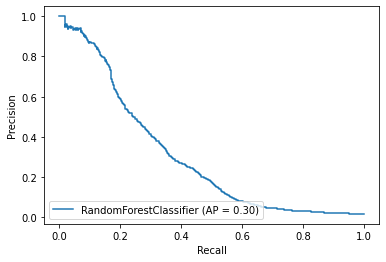

In [43]:
plot_precision_recall_curve(model,X_test,y_test)

In [49]:
from xgboost import XGBClassifier

clf = XGBClassifier(scale_pos_weight=171)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121574
           1       0.12      0.53      0.20       490

    accuracy                           0.98    122064
   macro avg       0.56      0.76      0.60    122064
weighted avg       0.99      0.98      0.99    122064

0.2509386250854586


## Compare no feature engineering

In [45]:
X_train_new=X_train.iloc[:,0:92].copy()
X_test_new=X_test.iloc[:,0:92].copy()

In [46]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11)
model.fit(X_train_new,y_train)
pred = model.predict(X_test_new)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   14.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   15.9s finished


In [47]:
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121574
           1       0.12      0.53      0.20       490

    accuracy                           0.98    122064
   macro avg       0.56      0.76      0.60    122064
weighted avg       0.99      0.98      0.99    122064

0.2509386250854586


array([[119768,    232],
       [  1806,    258]])

In [48]:
from xgboost import XGBClassifier

clf = XGBClassifier(scale_pos_weight=171)
clf.fit(X_train_new,y_train)
y_pred=clf.predict(X_test_new)
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121574
           1       0.12      0.53      0.20       490

    accuracy                           0.98    122064
   macro avg       0.56      0.76      0.60    122064
weighted avg       0.99      0.98      0.99    122064

0.2509386250854586


## DL for data with no feature engineering

In [52]:
# Load Keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

In [57]:
model = Sequential()
model.add(Dense(60, input_dim=X_train_new.shape[1], activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                5580      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
#Fit the Model
#callbacks = [EarlyStopping(monitor="val_recall", patience=3]
model.fit(X_train_new, y_train, epochs=20, batch_size=500, verbose=0,
          #callbacks=callbacks,
          validation_split=0.2)

In [59]:
y_pred=model.predict_classes(X_test_new)
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121574
           1       0.12      0.53      0.20       490

    accuracy                           0.98    122064
   macro avg       0.56      0.76      0.60    122064
weighted avg       0.99      0.98      0.99    122064

0.2509386250854586


In [62]:
import keras
METRIC=[keras.metrics.Recall(name='recall')]
model = Sequential()
model.add(Dense(60, input_dim=X_train_new.shape[1], activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRIC)
model.summary()

#Fit the Model
#callbacks = [EarlyStopping(monitor="val_recall", patience=3]
model.fit(X_train_new, y_train, epochs=20, batch_size=500, verbose=0,
          #callbacks=callbacks,
          validation_split=0.2)

y_pred=model.predict_classes(X_test_new)
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                5580      
_________________________________________________________________
dropout_9 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                